In [1]:
import pandas as pd
df = pd.read_csv("Final_dataset.csv")

In [2]:
print(df[["Duration (Months)", 'Enrollment', 'no_of_sites']].describe())

       Duration (Months)     Enrollment   no_of_sites
count       20584.000000   20584.000000  20584.000000
mean           22.608239     236.103964     17.696366
std            19.690501    3542.164769     43.093161
min             0.000000       1.000000      1.000000
25%             7.000000      23.000000      1.000000
50%            17.000000      48.000000      2.000000
75%            33.000000     135.000000     15.000000
max           124.000000  477102.000000    978.000000


In [12]:
import pandas as pd
from scipy.stats import skew

# Assuming your dataset is loaded into a DataFrame called `df`
columns_to_check = ['Duration (Months)', 'Enrollment', 'no_of_sites']

# Calculate skewness for the selected columns
skewness_values = df[columns_to_check].apply(skew)

# Display the results
for col, skewness in skewness_values.items():
    print(f"Skewness of {col}: {skewness:.2f}")

Skewness of Duration (Months): 1.34
Skewness of Enrollment: 119.50
Skewness of no_of_sites: 6.63


/Users/priteshpunj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/priteshpunj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/priteshpunj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/priteshpunj/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

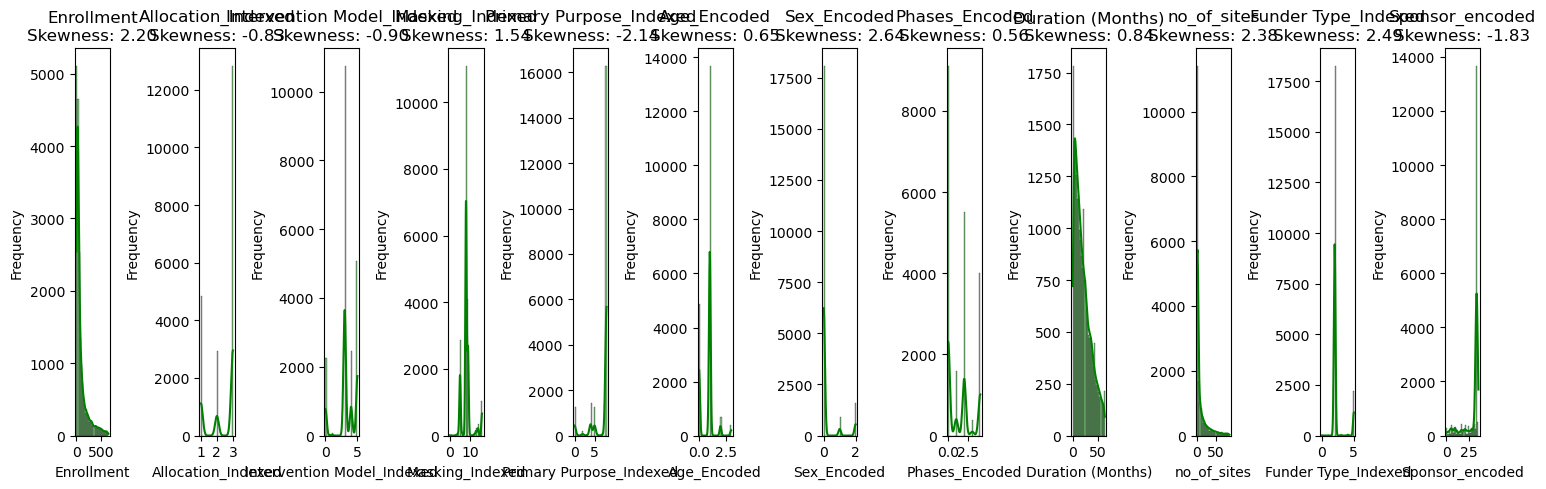

Skewness of Enrollment (Filtered): 2.20
Skewness of Allocation_Indexed (Filtered): -0.83
Skewness of Intervention Model_Indexed (Filtered): -0.90
Skewness of Masking_Indexed (Filtered): 1.54
Skewness of Primary Purpose_Indexed (Filtered): -2.14
Skewness of Age_Encoded (Filtered): 0.65
Skewness of Sex_Encoded (Filtered): 2.64
Skewness of Phases_Encoded (Filtered): 0.56
Skewness of Duration (Months) (Filtered): 0.84
Skewness of no_of_sites (Filtered): 2.38
Skewness of Funder Type_Indexed (Filtered): 2.49
Skewness of Sponsor_encoded (Filtered): -1.83


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# List of columns to process
columns_to_process = ['Enrollment', 'Allocation_Indexed', 'Intervention Model_Indexed', 
        'Masking_Indexed', 'Primary Purpose_Indexed', 'Age_Encoded', 'Sex_Encoded', 
        'Phases_Encoded', 'Duration (Months)', 
        'no_of_sites', 'Funder Type_Indexed', 'Sponsor_encoded']

# Dictionary to store filtered skewness values
filtered_skewness_dict = {}

# Set up subplots for visualizing all columns
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_process):
    # Calculate 95th percentile to cap extreme values
    percentile_95 = np.percentile(df[column], 95)

    # Filter out extreme outliers
    filtered_data = df[df[column] <= percentile_95]

    # Recalculate skewness for filtered data
    filtered_skewness = skew(filtered_data[column], nan_policy='omit')
    filtered_skewness_dict[column] = filtered_skewness

    # Plot distribution of filtered data
    plt.subplot(1, len(columns_to_process), i + 1)
    sns.histplot(filtered_data[column], kde=True, bins=30, color='green')
    plt.title(f'{column}\nSkewness: {filtered_skewness:.2f}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

# Print skewness for each column
for column, skewness_value in filtered_skewness_dict.items():
    print(f"Skewness of {column} (Filtered): {skewness_value:.2f}")